### Climate Change Impact Analysis

#### Climate Data Final Dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [11]:
# Load dataset
file_path = r"..\Data\Climate Change - datasets\climate_data_final_df.csv"
climate_merged_df = pd.read_csv(file_path,index_col=0)
climate_merged_df.head()

,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,Greenhouse gas emissions from agriculture,...,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita),Average Temperature,mmfrom1993-2008average,Forest area (% of land area),"Population, total",Renewable energy consumption (% of total final energy consumption)
Year,,,,,,,,,,,,,,,,,,,,,
1990,20000.0,0.0,4980000.0,0.0,129999.99,30000.0,0.0,0.0,20000.0,1190000.0,...,0.0,0.0,0.0,20000.0,0.037381,20.294119,-22.847396,10.766355,5587052.0,94.6
1991,30000.0,0.0,4980000.0,0.0,160000.00,40000.0,0.0,0.0,20000.0,1200000.0,...,0.0,0.0,0.0,20000.0,0.041754,20.114641,-22.814062,10.444938,5703857.0,93.5
1992,30000.0,0.0,4980000.0,0.0,129999.99,40000.0,0.0,0.0,20000.0,1220000.0,...,0.0,0.0,0.0,20000.0,0.036900,20.205328,-20.247396,10.123520,5858407.0,94.3
1993,30000.0,0.0,4980000.0,0.0,140000.00,40000.0,0.0,0.0,20000.0,1180000.0,...,0.0,0.0,0.0,20000.0,0.040017,20.415222,-22.780729,9.802103,5676843.0,94.0
1994,30000.0,0.0,4980000.0,0.0,140000.00,40000.0,0.0,0.0,20000.0,1070000.0,...,0.0,0.0,0.0,20000.0,0.041040,20.143436,-17.980729,9.480685,5713854.0,93.9


In [12]:
# Checking the shape
climate_merged_df.shape

(288, 26)

In [13]:
# Checking the datatypes 
climate_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 1990 to 2021
Data columns (total 26 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Carbon dioxide emissions from buildings                             288 non-null    float64
 1   Carbon dioxide emissions from industry                              288 non-null    float64
 2   Carbon dioxide emissions from land use change and forestry          288 non-null    float64
 3   Carbon dioxide emissions from other fuel combustion                 288 non-null    float64
 4   Carbon dioxide emissions from transport                             288 non-null    float64
 5   Carbon dioxide emissions from manufacturing and construction        288 non-null    float64
 6   Fugitive emissions of carbon dioxide from energy production         288 non-null    float64
 7   Carbon dioxide emi

In [14]:
# checking the summary statistics
climate_merged_df.describe()

,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,Greenhouse gas emissions from agriculture,...,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita),Average Temperature,mmfrom1993-2008average,Forest area (% of land area),"Population, total",Renewable energy consumption (% of total final energy consumption)
count,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,...,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,288.000000,288.000000,288.000000,288.000000,2.880000e+02,288.000000
mean,3.047569e+05,4.472569e+05,1.557267e+07,1.197917e+05,1.687882e+06,6.612847e+05,8.156250e+05,4.581944e+05,4.077083e+05,2.774448e+07,...,4.597917e+05,8.156250e+05,1.587500e+05,4.110069e+05,0.107828,23.444696,19.322579,18.848557,2.666325e+07,81.718750
std,4.364897e+05,8.584087e+05,1.616847e+07,1.966159e+05,2.172433e+06,1.014516e+06,3.350738e+06,6.663721e+05,6.014862e+05,2.636820e+07,...,6.686822e+05,3.350738e+06,2.206464e+05,6.066852e+05,0.084045,2.571756,29.243990,15.507849,2.480963e+07,19.273683
min,1.000000e+04,0.000000e+00,-7.570000e+06,0.000000e+00,1.200000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.020000e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.021731,18.802792,-22.847396,6.189004,4.737633e+06,27.500000
25%,3.000000e+04,0.000000e+00,4.980000e+06,1.000000e+04,3.500000e+05,6.000000e+04,0.000000e+00,2.000000e+04,4.000000e+04,3.080000e+06,...,2.000000e+04,0.000000e+00,1.000000e+04,4.750000e+04,0.056284,21.944115,-4.689062,10.828942,9.550030e+06,79.950000
50%,8.000000e+04,6.000000e+04,1.068500e+07,6.000000e+04,9.200000e+05,1.600000e+05,0.000000e+00,1.850000e+05,2.100000e+05,2.317500e+07,...,1.850000e+05,0.000000e+00,8.000000e+04,2.150000e+05,0.075044,23.075159,14.135938,11.927962,1.487155e+07,89.900000
75%,4.450000e+05,4.525000e+05,1.735000e+07,1.225000e+05,2.350000e+06,8.400000e+05,2.000000e+04,6.700000e+05,3.200000e+05,4.253750e+07,...,6.700000e+05,2.000000e+04,2.200000e+05,3.225000e+05,0.127770,25.465664,47.995854,18.473750,3.720003e+07,93.600000
max,2.200000e+06,4.610000e+06,6.370000e+07,1.260000e+06,1.082000e+07,5.170000e+06,2.235000e+07,2.930000e+06,2.610000e+06,1.299000e+08,...,2.940000e+06,2.235000e+07,1.260000e+06,2.640000e+06,0.420968,28.887740,66.704325,64.788903,1.221386e+08,97.500000


In [15]:
# Checking for duplicates
print("Number of duplicates:",climate_merged_df.duplicated().sum())

Number of duplicates: 0


In [16]:
# Check for missing values
missing_values = climate_merged_df.isnull().sum().sort_values(ascending=False)
# missing values as percentage
missing_values_percent = (missing_values/len(climate_merged_df)*100)

missing_summary = pd.DataFrame({"missing values": missing_values,
             "missing values percent":missing_values_percent
             })
missing_summary

,missing values,missing values percent
Carbon dioxide emissions from buildings,0,0.0
Carbon dioxide emissions from industry,0,0.0
"Population, total",0,0.0
Forest area (% of land area),0,0.0
mmfrom1993-2008average,0,0.0
Average Temperature,0,0.0
Annual CO₂ emissions (per capita),0,0.0
Greenhouse gas emissions from bunker fuels,0,0.0
Greenhouse gas emissions from other fuel combustion,0,0.0
Fugitive emissions of greenhouse gases from energy production,0,0.0


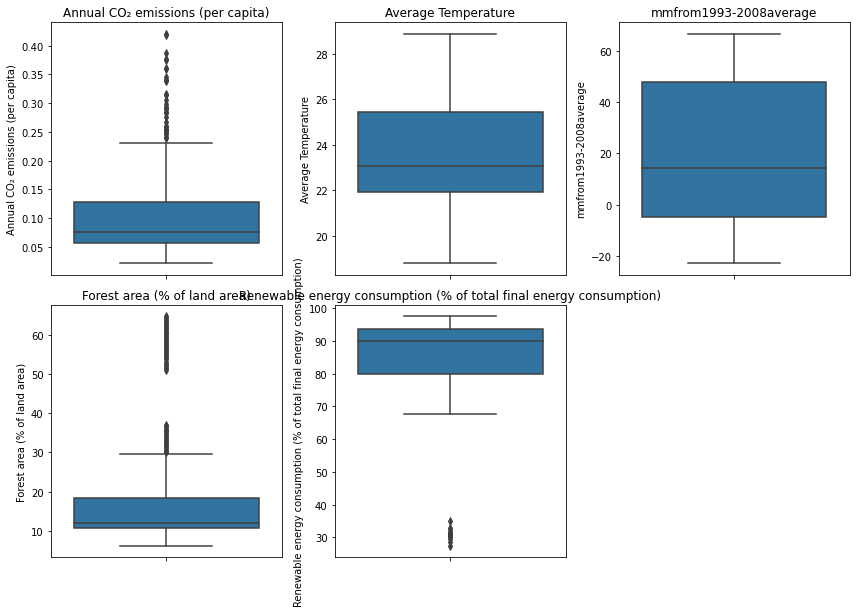

In [17]:
# Checking for outliers 
columns_to_plt = ["Annual CO₂ emissions (per capita)", "Average Temperature", "mmfrom1993-2008average",
                   "Forest area (% of land area)", "Renewable energy consumption (% of total final energy consumption)"]

plt.figure(figsize=(12,8))
for i, col in enumerate(columns_to_plt, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=climate_merged_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### Handle missing values

- using median to fill average temperatures because temperature distributions often have outliers, especially for regions with extreme climates.Median is not significantly affected by outliers.
- Using the mean per country to fill forest area of land and Reneweable energy ensures we fill missing values based on similar data points rather than a global statistic and these values are highly dependent on the country or region.

In [18]:
climate_merged_df["Average Temperature"].fillna(climate_merged_df["Average Temperature"].median(), inplace=True)
climate_merged_df["Forest area (% of land area)"].fillna(climate_merged_df.groupby("Entity")["Forest area (% of land area)"].transform("mean"), inplace=True)
climate_merged_df["Renewable energy consumption (% of total final energy consumption)"].fillna(
    climate_merged_df.groupby("Entity")["Renewable energy consumption (% of total final energy consumption)"].transform("mean"), inplace=True
)

# Verify that missing values are handled
print("Number of duplicates:",climate_merged_df.isnull().sum().sum())


KeyError: 'Entity'

### Exploratory Data Analysis

##### CO2 Emissions Over Time 

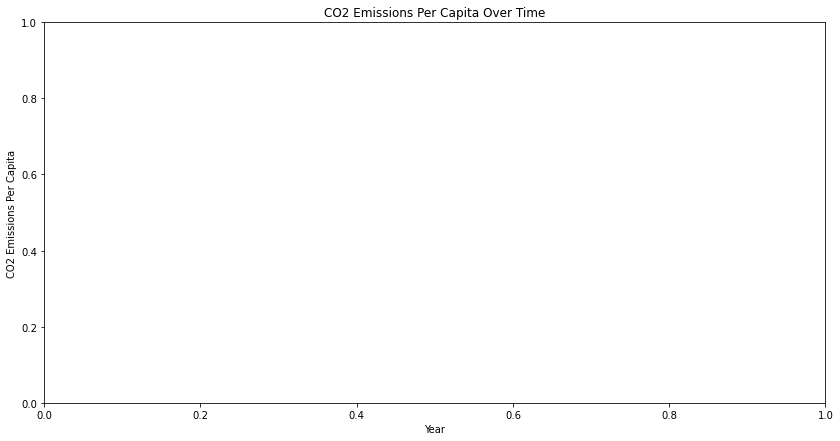

In [ ]:
# Visualise african countries only 
East_african_countries = [
    "Burundi","Ethiopia", "Kenya", "Malawi","Rwanda","Somalia", "South Sudan", "Tanzania", "Uganda"
]

# Filter dataset for African countries
climate_merged_df= climate_merged_df[climate_merged_df['Entity'].isin(East_african_countries)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=climate_merged_df, x='Year', y='Annual CO₂ emissions (per capita)', hue='Entity')
plt.title('CO2 Emissions Per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Per Capita')
plt.show()

##### Temperature Changes Over Time trend per country


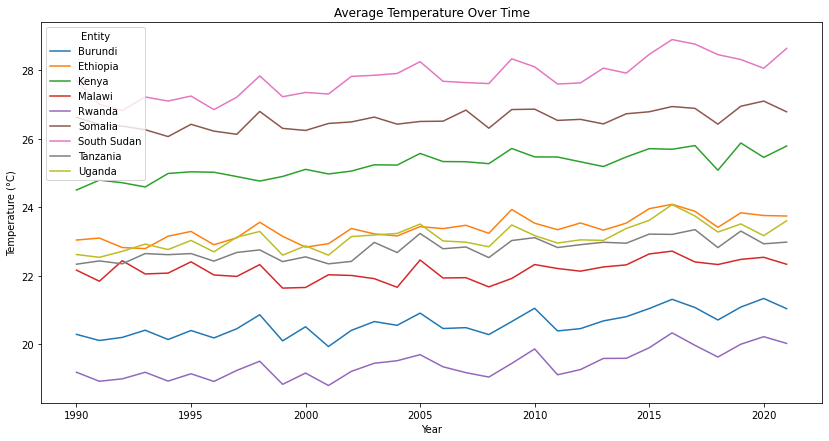

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=climate_merged_df, x='Year', y='Average Temperature', hue='Entity')
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

##### Correlation Between CO2 Emissions & Temperature

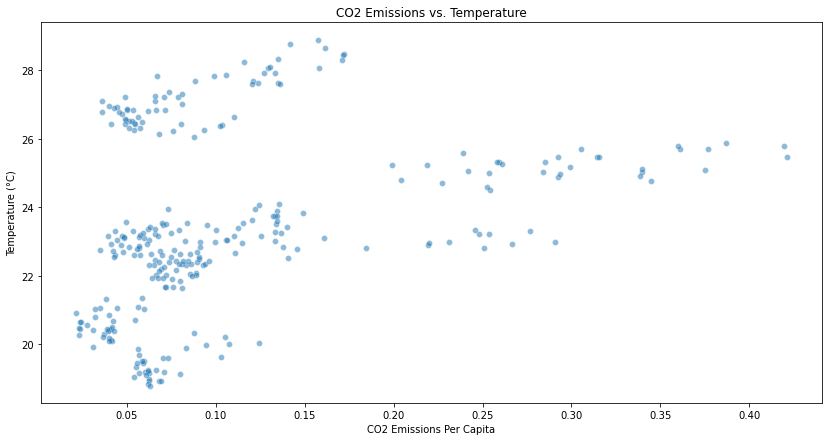

In [ ]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=climate_merged_df, x='Annual CO₂ emissions (per capita)', y='Average Temperature', alpha=0.5)
plt.title('CO2 Emissions vs. Temperature')
plt.xlabel('CO2 Emissions Per Capita')
plt.ylabel('Temperature (°C)')
plt.show()

#### Total CO₂ Emissions vs. Temperature Over Time

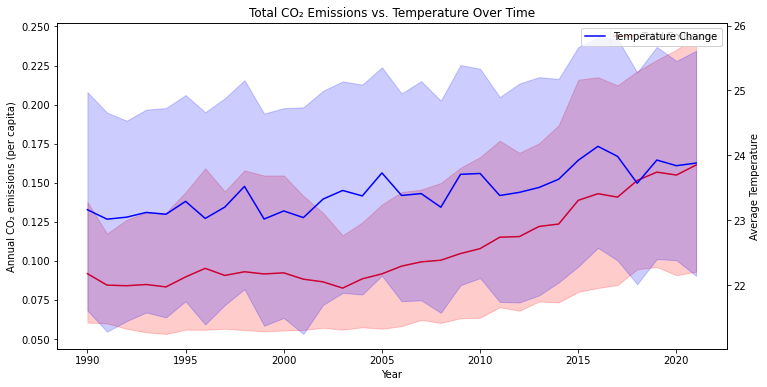

In [ ]:
# Plot Total CO₂ Emissions
plt.figure(figsize=(12, 6))
sns.lineplot(data=climate_merged_df, x='Year', y='Annual CO₂ emissions (per capita)', label='Total Emissions', color='red')

# Plot Temperature Change on a Secondary Axis
ax2 = plt.gca().twinx()
sns.lineplot(data=climate_merged_df, x='Year', y='Average Temperature', label='Temperature Change', ax=ax2, color='blue')
plt.title("Total CO₂ Emissions vs. Temperature Over Time")
plt.xlabel("Year")
plt.show()

- The increase in CO2 emissions, often from human activities like fossil fuel consumption and deforestation, is strongly linked to the greenhouse effect, which can lead to rising temperatures.The upward trend in both could suggest a correlation.

#### Total CO₂ Emissions by Sectors

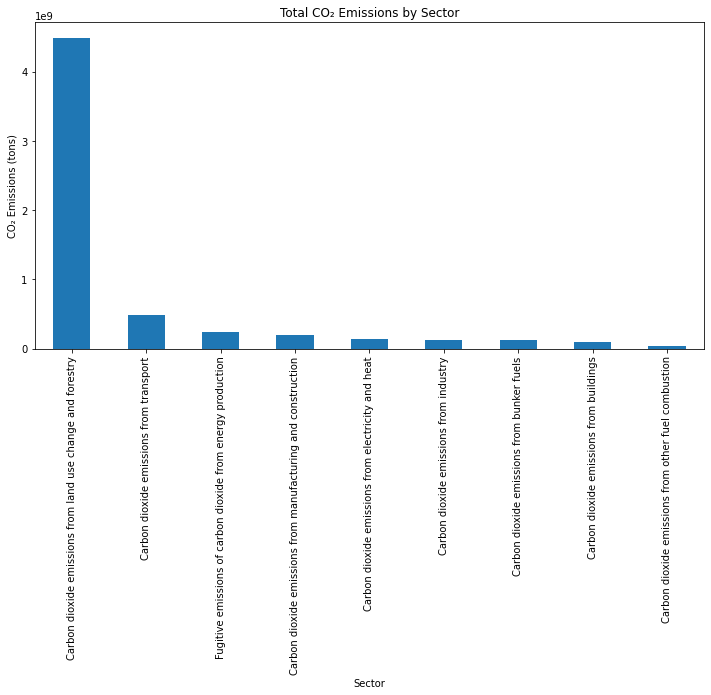

In [ ]:
# Co2 emissions by columns
Co2_emissions_cols = [
       'Carbon dioxide emissions from buildings',
       'Carbon dioxide emissions from industry',
       'Carbon dioxide emissions from land use change and forestry',
       'Carbon dioxide emissions from other fuel combustion',
       'Carbon dioxide emissions from transport',
       'Carbon dioxide emissions from manufacturing and construction',
       'Fugitive emissions of carbon dioxide from energy production',
       'Carbon dioxide emissions from electricity and heat',
       'Carbon dioxide emissions from bunker fuels']
       
    

# Grouping emissions by sector 
total_Co2_emissions = climate_merged_df[Co2_emissions_cols].sum()

# Convert to DataFrame for better visualization
total_emissions_df = pd.DataFrame(total_Co2_emissions, columns=["Total Emissions"])
total_emissions_df = total_emissions_df.sort_values(by="Total Emissions", ascending=False)

total_emissions_df.plot(kind="bar", figsize=(12,6), legend=False)
plt.title("Total CO₂ Emissions by Sector")
plt.ylabel("CO₂ Emissions (tons)")
plt.xlabel("Sector")
plt.show()

- Co2 emissions from land use change and forestry is the highest


##### Emissions by Year

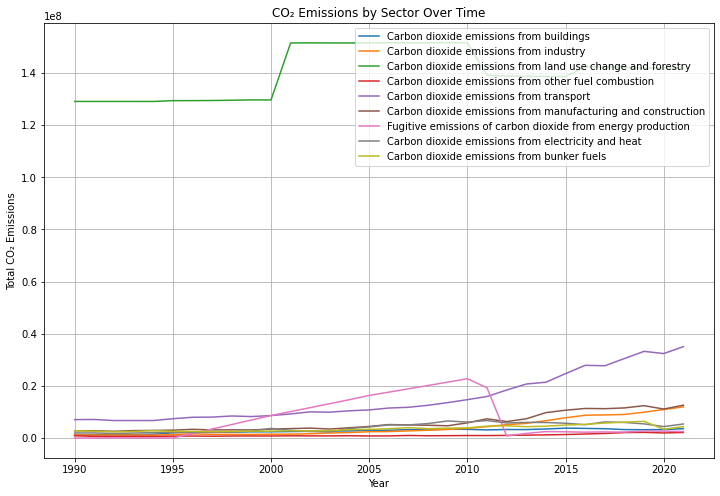

In [ ]:
sector_yearly = climate_merged_df.groupby('Year')[Co2_emissions_cols].sum()

plt.figure(figsize=(12,8))
for sector in Co2_emissions_cols:
    plt.plot(sector_yearly.index.values, sector_yearly[sector].values, label=sector)
plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions")
plt.title("CO₂ Emissions by Sector Over Time")
plt.grid()
plt.legend(loc='upper right');

- Land Use Change and Forestry - shows a sharp rise followed by stabilization, likely due to deforestation spikes
- Transport - emissions steadily increase, reflecting urbanization, vehicle growth, and reliance on transportation
- Electricity and Heat - Production display slight upward trends, driven by rising energy demand, moderated somewhat by renewable energy use.
- others remain relatively steady or exhibit moderate growth.

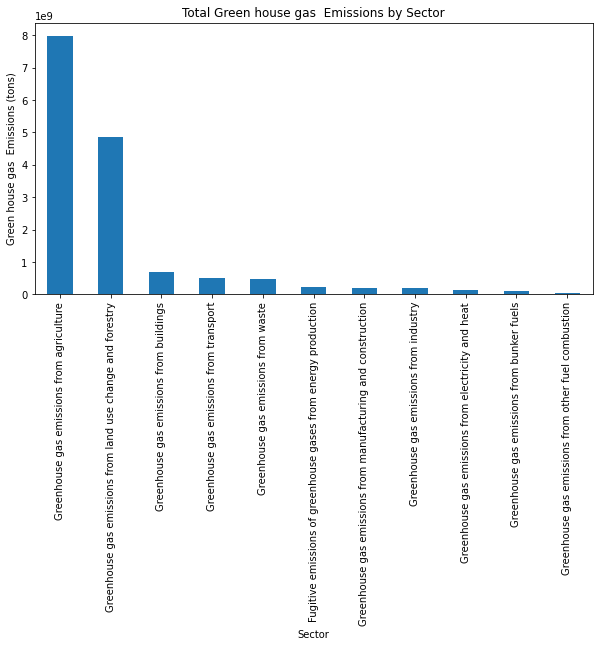

In [ ]:
#green house by sector

GhG_columns = [
    'Greenhouse gas emissions from agriculture',
       'Greenhouse gas emissions from land use change and forestry',
       'Greenhouse gas emissions from waste',
       'Greenhouse gas emissions from buildings',
       'Greenhouse gas emissions from industry',
       'Greenhouse gas emissions from manufacturing and construction',
       'Greenhouse gas emissions from transport',
       'Greenhouse gas emissions from electricity and heat',
       'Fugitive emissions of greenhouse gases from energy production',
       'Greenhouse gas emissions from other fuel combustion',
       'Greenhouse gas emissions from bunker fuels'
]

# Grouping green house emissions by sector 
GH_sector_emissions = climate_merged_df[GhG_columns].sum()

# Convert to DataFrame for better visualization
sector_emissions_df = pd.DataFrame(GH_sector_emissions, columns=["Total Emissions"])
sector_emissions_df = sector_emissions_df.sort_values(by="Total Emissions", ascending=False)

sector_emissions_df.plot(kind="bar", figsize=(10,5), legend=False)
plt.title("Total Green house gas  Emissions by Sector")
plt.ylabel("Green house gas  Emissions (tons)")
plt.xlabel("Sector")
plt.show()

- Greenhouse gas emissions from agriculture was the highest.

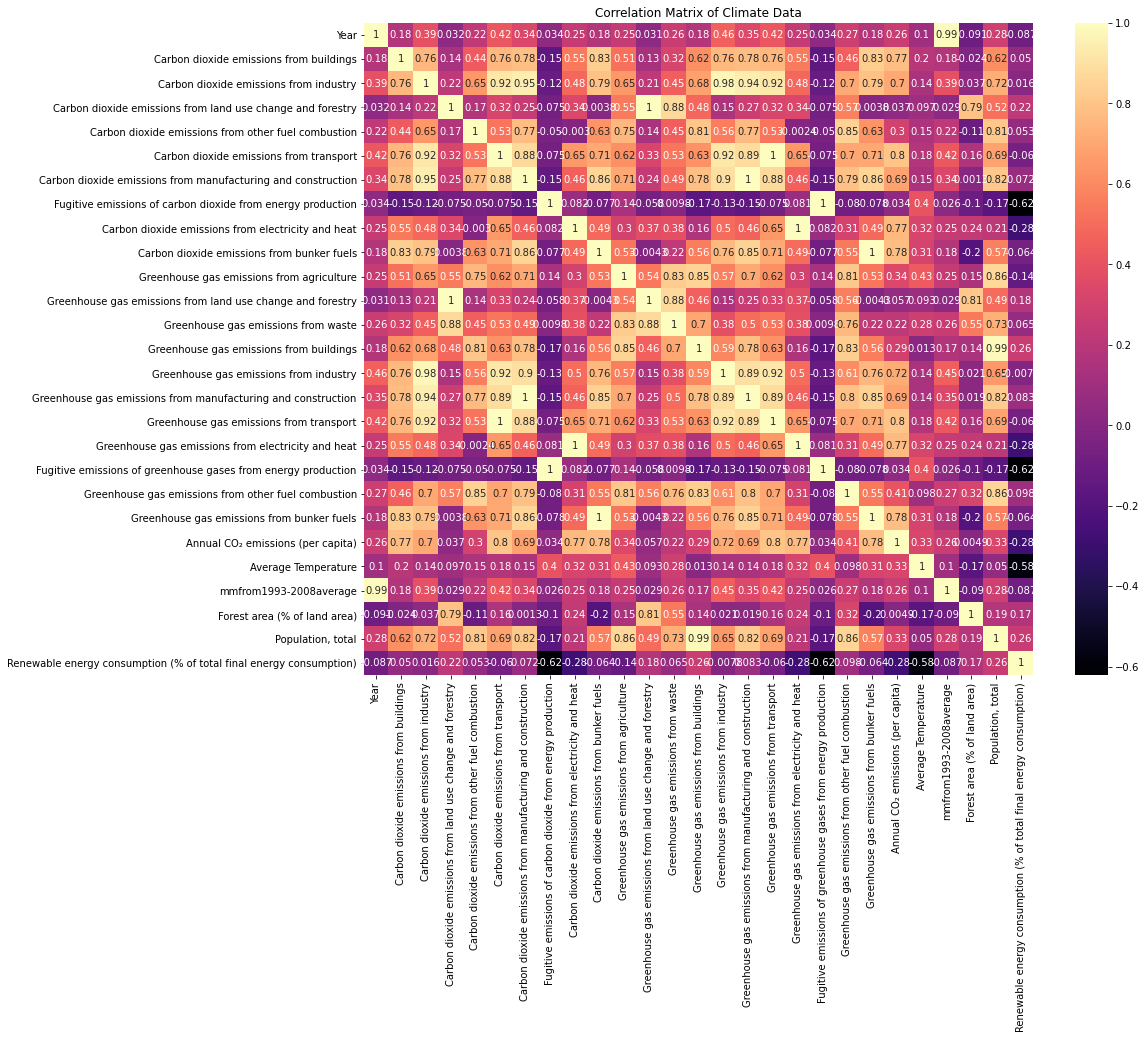

In [ ]:
# Select  numeric columns
numeric_df = climate_merged_df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 12))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.title("Correlation Matrix of Climate Data")
plt.show()


#### Climate Risk Index Dataset

#### Loading dataset

In [ ]:
# Load dataset
file_path = r"..\Data\Climate Change - datasets\Climate Risk Index.csv"
index_df = pd.read_csv(file_path)
index_df.head()

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [ ]:
# Chaeck the shape of the dataset
index_df.shape

(182, 17)

In [ ]:
# Calculate summary statistics
index_df.describe()

,index,cartodb_id,the_geom,the_geom_webmercator,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total
count,182.000000,182.000000,0.0,0.0,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,131.000000,182.000000,182.000000
mean,90.500000,91.500000,NaN,NaN,85.230769,81.791923,78.609890,0.519670,77.626374,86.840659,85.302198,1.517654,85.302198,907.507599
std,52.683014,52.683014,NaN,NaN,44.708529,34.582412,37.858511,3.393934,37.500688,427.350623,44.691600,8.171267,44.691600,4483.998505
min,0.000000,1.000000,NaN,NaN,1.000000,12.170000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000100,1.000000,0.000000
25%,45.250000,46.250000,NaN,NaN,46.250000,52.872500,46.250000,0.000000,46.250000,0.000000,46.250000,0.016500,46.250000,0.000000
50%,90.500000,91.500000,NaN,NaN,91.000000,77.500000,91.500000,0.020000,90.000000,2.000000,91.500000,0.084100,91.500000,30.347000
75%,135.750000,136.750000,NaN,NaN,135.000000,124.500000,114.000000,0.120000,114.000000,22.750000,135.000000,0.275950,135.000000,262.178250
max,181.000000,182.000000,NaN,NaN,135.000000,124.500000,114.000000,43.660000,114.000000,4317.000000,135.000000,77.369400,135.000000,40077.222000


In [ ]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

1) cri_rank & cri_score
- CRI score and rank measure how severely a country is affected by climate-related events.
A higher CRI rank indicates greater vulnerability to the negative impacts of climate-related disasters.

2) fatalities_per_100k_total & fatalities_rank
 - Show how deadly climate disasters are per 100,000 people.
Higher fatalities suggest regions with poor climate resilience.

3) losses_per_gdp_total & losses_per_gdp_rank
-Shows economic losses as a percentage of GDP, helping measure financial vulnerability.
If losses are high, climate events have a major economic impact in that country.

4) losses_usdm_ppp_total & losses_usdm_ppp_rank
- Shows total climate-induced economic losses in million USD.
Helps to compare how much money different countries lose due to climate-related disasters.

#### Data Cleaning

In [ ]:
# Drop the null columns
index_df = index_df.drop(['the_geom','the_geom_webmercator'],axis=1)
# Handle missing values 
index_df['losses_per_gdp__total'].fillna(index_df['losses_per_gdp__total'].median(),inplace=True)
# Drop rows with missing rw_country_code
index_df.dropna(subset=['rw_country_code'],inplace=True)
print("Cleaned dataset overview:")
print(index_df.isnull().sum())

Cleaned dataset overview:
index                        0
cartodb_id                   0
country                      0
cri_rank                     0
cri_score                    0
fatalities_per_100k_rank     0
fatalities_per_100k_total    0
fatalities_rank              0
fatalities_total             0
losses_per_gdp__rank         0
losses_per_gdp__total        0
losses_usdm_ppp_rank         0
losses_usdm_ppp_total        0
rw_country_code              0
rw_country_name              0
dtype: int64


- The dataset has no missing values

#### Checking for Duplicates

In [ ]:
print('Number of duplicates:',index_df.duplicated().sum())

Number of duplicates: 0


### Exploratory Data Analysis

#### Climate Risk Ranking per country

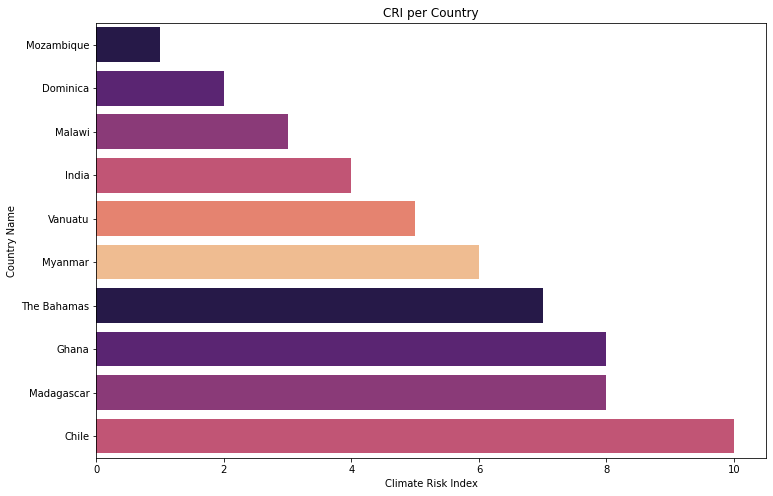

In [ ]:
plt.figure(figsize=(12,8))
plt.title("CRI per Country")
sns.barplot(data=index_df, x="cri_rank", y="rw_country_name",
                        order=index_df.sort_values('cri_rank').rw_country_name[:10],
                        palette=sns.color_palette('magma'))
plt.xlabel('Climate Risk Index')
plt.ylabel('Country Name')

plt.show()

- Countries with high CRI scores often face substantial economic losses due to damage to infrastructure, agriculture.These losses can hinder economic growth and development.
- High CRI scores are associated with increased fatalities, injuries, and displacement of people.


#### Climate impact on Health

##### Top 10 Countries affected by Fatalities

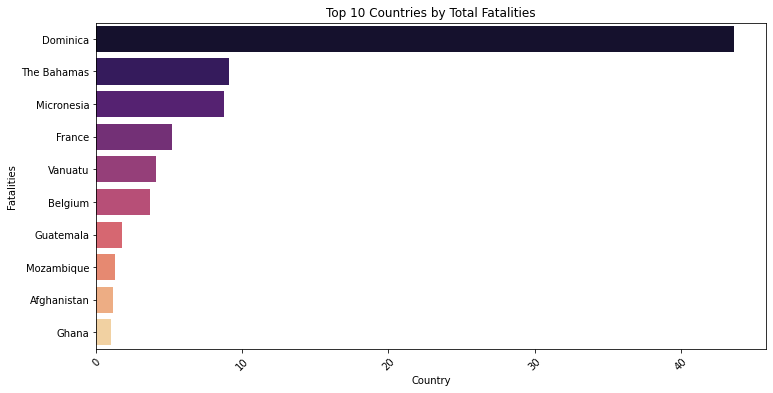

In [ ]:
top_fatalities = index_df.nlargest(10, 'fatalities_per_100k_total')
plt.figure(figsize=(12, 6))
sns.barplot(y='country', x='fatalities_per_100k_total', data=top_fatalities, palette='magma')
plt.title('Top 10 Countries by Total Fatalities')
plt.xlabel('Country')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.show()

1. Health Impacts
- Countries like Dominica,the Bahamas and Micronesia have high fatality counts due to their large populations and frequent exposure to extreme weather events like cyclones,flood,droughts affecting densely polpulated areas.

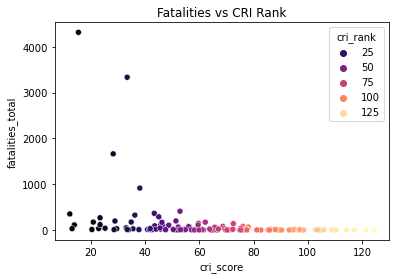

In [ ]:
sns.scatterplot(data=index_df, x='cri_score', y='fatalities_total', hue='cri_rank', palette='magma')
plt.title('Fatalities vs CRI Rank')
plt.show()

- Countries with relatively low fatalities could indicate regions with strong climate resilience measures such as advanced early warning systems.These countries may also benefit from higher GDP and more resources to mitigate climate risks.
- Countries showing much higher fatalities might be those experiencing extreme vulnerability to climate impacts. These countries could face recurring events like hurricanes, floods, or droughts, coupled with inadequate climate adaptation measures or socioeconomic challenges.
- Countries with high CRI ranks shows their increased susceptibility to climate impacts while those with lower CRI ranks might show reduced fatalities, indicating better adaptation strategies

#### Climate Impact on Economy

##### Top 10 countries affected by climate related Economic losses

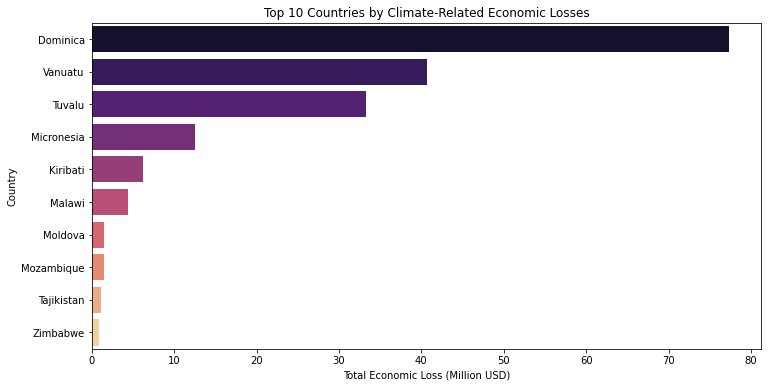

In [ ]:
top_countries_with_losses = index_df.nlargest(10, 'losses_per_gdp__total')
plt.figure(figsize=(12, 6))
sns.barplot(y=top_countries_with_losses['country'], x=top_countries_with_losses['losses_per_gdp__total'], palette='magma')
plt.title("Top 10 Countries by Climate-Related Economic Losses")
plt.xlabel("Total Economic Loss (Million USD)")
plt.ylabel("Country")
plt.show()

#### Correlation

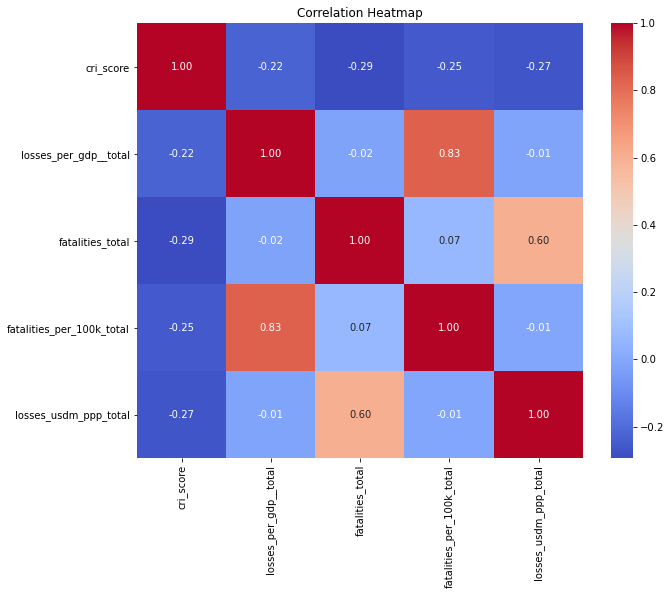

In [ ]:
# Relevant columns for correlation analysis
correlation_data = index_df[['cri_score', 'losses_per_gdp__total', 'fatalities_total', 'fatalities_per_100k_total','losses_usdm_ppp_total',]]

# compute correlation
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### Prediction Model

In [ ]:
# Predicting CRI Score based on Economic and Health Factors
features = ['fatalities_total', 'losses_usdm_ppp_total', 'losses_per_gdp__total']
target = 'cri_score'


X = index_df[features]
y = index_df[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Model Performance:\n Mean Absolute Error: {mae:.4f}\n R-squared: {r2:.4f}')


Model Performance:
 Mean Absolute Error: 6.0430
 R-squared: 0.9021


In [ ]:

# Define models
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Hyperparameter tuning
param_grid = {
    'RandomForest': {'n_estimators': [50, 100, 200]},
    'GradientBoosting': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'n_estimators': [50, 100, 200],}
}
#Hyper
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    # Use GridSearchCV 
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], 
                               cv=3, scoring="r2", n_jobs=-1)
    grid_search.fit(X_train, y_train)  # Fit the model on training data
    best_models[model_name] = grid_search.best_estimator_  # Store best model
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    
# Evaluate models
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test)  
    mae = mean_absolute_error(y_test, y_pred)  # Calculate Mean Absolute Error
    r2 = r2_score(y_test, y_pred)  # Calculate R-squared score
    
    # Display performance metrics
    print(f"{model_name} Performance:")
    print(f" Mean Absolute Error: {mae:.4f}")
    print(f" R-squared: {r2:.4f}")

Tuning RandomForest...
Best Parameters for RandomForest: {'n_estimators': 50}
Tuning GradientBoosting...
Best Parameters for GradientBoosting: {'n_estimators': 50}
Tuning XGBoost...
Best Parameters for XGBoost: {'n_estimators': 50}

Evaluating RandomForest...
RandomForest Performance:
 Mean Absolute Error: 6.2087
 R-squared: 0.8874

Evaluating GradientBoosting...
GradientBoosting Performance:
 Mean Absolute Error: 6.7253
 R-squared: 0.8816

Evaluating XGBoost...
XGBoost Performance:
 Mean Absolute Error: 7.3167
 R-squared: 0.8446


Model tuning results indicate that RandomForest untuned performed the best with an R² of 0.90 and a MAE of 6.04.